In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv("/content/delhi-weather-aqi-2025.csv", on_bad_lines='skip')

In [7]:
print("\n--- Raw Data Info ---")
print(df.info())


--- Raw Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_ist        52560 non-null  object 
 1   time_ist        52560 non-null  object 
 2   location        52560 non-null  object 
 3   lat             52560 non-null  float64
 4   lon             52560 non-null  float64
 5   temp_c          52560 non-null  float64
 6   humidity        52560 non-null  int64  
 7   pressure_mb     52560 non-null  float64
 8   windspeed_kph   52560 non-null  float64
 9   condition_text  52560 non-null  object 
 10  description     52560 non-null  object 
 11  aqi_index       52560 non-null  int64  
 12  pm2_5           52560 non-null  float64
 13  pm10            52560 non-null  float64
 14  co              52560 non-null  int64  
 15  no2             52560 non-null  float64
dtypes: float64(8), int64(3), object(5)
memory usage: 6.4+

In [8]:
# Drop useless columns
drop_cols = ['location', 'condition_description']
for col in drop_cols:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)


In [9]:
# Fix date if exists
if 'date_ist' in df.columns:
    df['date_ist'] = pd.to_datetime(df['date_ist'], errors='coerce')


In [10]:
# Remove missing values
df.dropna(inplace=True)

In [11]:
print("\n--- After Cleaning ---")
print(df.info())



--- After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
Index: 20736 entries, 0 to 49823
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date_ist        20736 non-null  datetime64[ns]
 1   time_ist        20736 non-null  object        
 2   lat             20736 non-null  float64       
 3   lon             20736 non-null  float64       
 4   temp_c          20736 non-null  float64       
 5   humidity        20736 non-null  int64         
 6   pressure_mb     20736 non-null  float64       
 7   windspeed_kph   20736 non-null  float64       
 8   condition_text  20736 non-null  object        
 9   description     20736 non-null  object        
 10  aqi_index       20736 non-null  int64         
 11  pm2_5           20736 non-null  float64       
 12  pm10            20736 non-null  float64       
 13  co              20736 non-null  int64         
 14  no2             20736 non-null  flo

In [12]:
features = ['temp_c', 'humidity', 'pressure_mb', 'windspeed_kph']
target = 'aqi_index'

X = df[features]
y = df[target]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

print("\nModel training completed.")


Model training completed.


In [16]:
y_pred = model.predict(X_test)


In [18]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Performance ---")
print("MAE:", mae)
print("R2 Score:", r2)


--- Model Performance ---
MAE: 121.76804327386692
R2 Score: 0.4223437607708367


In [19]:
# 8. Risk Classification Function
# =========================
def risk_level(aqi):
    if aqi > 300:
        return "SEVERE"
    elif aqi > 200:
        return "POOR"
    elif aqi > 100:
        return "MODERATE"
    else:
        return "SAFE"

In [20]:
sample_input = [[32, 65, 1010, 3.5]]
# temp, humidity, pressure, windspeed

predicted_aqi = model.predict(sample_input)[0]
risk = risk_level(predicted_aqi)

print("\n--- Sample Prediction ---")
print("Predicted AQI:", round(predicted_aqi, 2))
print("Risk Level:", risk)



--- Sample Prediction ---
Predicted AQI: 191.25
Risk Level: MODERATE


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


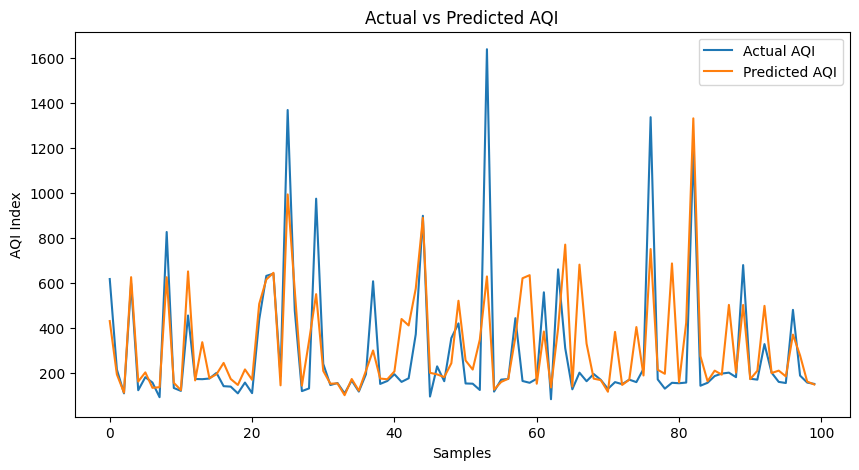

In [25]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label="Actual AQI")
plt.plot(y_pred[:100], label="Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.xlabel("Samples")
plt.ylabel("AQI Index")
plt.legend()
plt.show()